## Gradio Pets

In [1]:
!pip install -Uqq fastai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 3.50.0 requires numpy~=1.0, but you have numpy 2.3.0 which is incompatible.


In [2]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

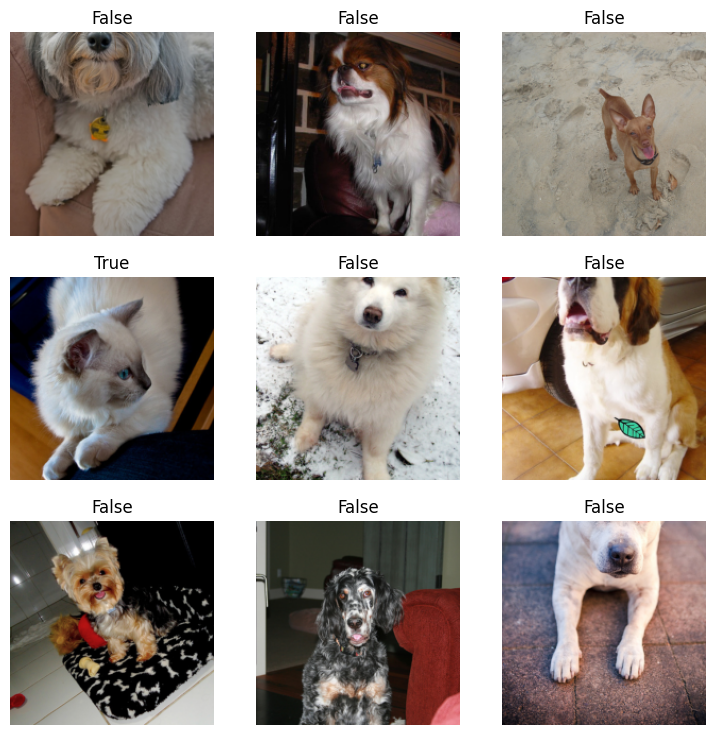

In [4]:
dls.show_batch()

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.198319,0.043266,0.012855,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.081246,0.028299,0.010149,00:34
1,0.043271,0.026380,0.006766,00:33
2,0.019887,0.022561,0.010149,00:34


In [6]:
learn.export('../models/dogs_cats.pkl')